# Udemy data Analysis 
유데미 데이터를 이용한 파이썬 데이터 분석   
   
**분석자**
- 201904128 ICT 공학부 홍윤기
- 201904065 ICT 공학부 오세현

# 목차
---
# 1. 서론

# 2. 데이터 전처리
 > ## 1.1 데이터 정보 읽기
 > ## 1.2 데이터 메모리 최적화
 
# 3. 데이터 분석 및 시각화
> ## 3.1 트랜드 분석
> ## 3.2 강좌 가격 책정 요인(영향) 분석
> ## 3.3 강좌 수익 분석
> ## 3.4 WordCloud를 활용한 주요 키워드 분석

# 4. 결론 및 활용 방안

# 1. 서론
최근 코로나 19 사태 후 대면 교육이 어려워 지고 온라인 교육 시장(비대면, 디지털 강의)이 성장하고 있는 추세이다. <br>
이러한 현상으로 교육, 자기계발 등 다양한 온라인 과목이 생겨났다. 수강자는 다양한 주제 중 실용적인 과목을 듣고 싶어할 것이며, 코스 제공자는 현 트랜드를 분석하여, 많은 수강자를 모으기를 원할 것이다. 
그렇기에 과목 중 인기 있는 주제 및 코스(강좌)을 파악하고 수익 등 다양한 방향으로 분석 한다면 수강자와 코스 제공자에게 도움이 될 것이다. <br>
<br>
이번 분석에서는 Kaggle에서 제공하는 Udemy 코스 데이터 셋을 활용하여 비즈니스 금융, 그래픽 디자인, 음악 악기, 웹 디자인 등 4가지 주제에 대해서 분석하고 현 트랜드를 파악하고자 한다.

# 2. 데이터 전처리
---
## 2.1 데이터 정보 읽기 
- row, column 확인
<br>
데이터 전처리를 위해 데이터 정보를 읽어 올 것이다.

In [1]:
# 데이터 분석에 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime # datetime을 정렬하기위함

In [2]:
'''
# 데이터 참고 출처
@misc{willden,
url={http://theconceptcenter.com/simple-research-study-udemy-courses/},
journal={Concept Center},
author={Willden, Chase}}
'''

'\n# 데이터 참고 출처\n@misc{willden,\nurl={http://theconceptcenter.com/simple-research-study-udemy-courses/},\njournal={Concept Center},\nauthor={Willden, Chase}}\n'

In [3]:
# 분석할 데이터 읽어오고 보여주기
course = pd.read_csv('data/udemy_courses.csv')
course

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [4]:
# colums 종류 확인
course.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
# 기초 통계값(수치형) 분석
# 혹시 몰라서.. count: column 갯수 / mean: column 평균 / std: column 표준편차
course.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


## 2.2 데이터 메모리 최적화
데이터 메모리 용량을 줄이고 처리 속도 향상
### 현재 데이터의 columns 목록

- **course_id:** course(강좌) 고유 id
- **course_title:** course의 제목
- **url:** 해당 course url(링크)
- **is_paid:** course 유료 무료 차이
- **price:** course 가격
- **num_subscribers:** 해당 course 구독자 수
- **num_reviews:** 해당 course 리뷰 수
- **num_lectures:** course가 포함하고 있는 수업(영상) 수
- **level:** course 난이도
- **content_duration:** coures 모든 수업(영상) 시간
- **published_timestamp:** course 제공 날짜
- **subject:** course 분야

In [6]:
course.info() # 각 컬럼의 데이터 타입을 확인한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
# 데이터 타입 크기 확인하는 방법 
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [8]:
# 각 칼럼별 총 메모리 계산
before_musage = course.memory_usage(deep=True).sum()

In [9]:
# 수치형 데이터 타입 변경
course = course.astype({'course_id' : np.int32, 
             'price' : np.int16, 
             'num_subscribers' : np.int32, 
             'num_reviews' : np.int16, 
             'num_lectures' : np.int16,
             'content_duration' : np.float16
            })

In [10]:
course.describe().T # 데이터 손실이 있는지 확인한다.

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.093750,6.054688,0.0,1.0,2.0,4.50,78.5


In [11]:
# 자료형 데이터 타입 변경을 위한 nunique 값 갯수 찾기
# object -> category 화 하기 위해서 / 메모리 용량 save
course.level.nunique()

4

In [12]:
course.subject.nunique()

4

In [13]:
# 자료형 테이터 타입 변경
course['level'] = course['level'].astype('category')
course['subject'] = course['subject'].astype('category')

In [14]:
course['published_timestamp'] = (pd.to_datetime(course['published_timestamp'], format='%Y-%m-%dT%H:%M:%SZ', errors='raise'))

## 2.2 데이터 메모리 최적화 결과

In [15]:
course.info() # 데이터 타입이 잘 변경되었는지 확인한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3678 non-null   int32         
 1   course_title         3678 non-null   object        
 2   url                  3678 non-null   object        
 3   is_paid              3678 non-null   bool          
 4   price                3678 non-null   int16         
 5   num_subscribers      3678 non-null   int32         
 6   num_reviews          3678 non-null   int16         
 7   num_lectures         3678 non-null   int16         
 8   level                3678 non-null   category      
 9   content_duration     3678 non-null   float16       
 10  published_timestamp  3678 non-null   datetime64[ns]
 11  subject              3678 non-null   category      
dtypes: bool(1), category(2), datetime64[ns](1), float16(1), int16(3), int32(2), object(2)
memo

In [16]:
after_musage = course.memory_usage(deep=True).sum() # 전처리 이전 대비 용량

In [17]:
print(f'%.2f%%'%(after_musage*100/before_musage)) # 전처리 이후 메모리 출력

50.71%


## 결과
### 이전 대비 **_50.71%_** 로 메모리를 효과적으로 줄였습니다.   
<br>

# 3. 데이터 분석 및 시각화
---

# 3.1 트랜드 분석
- 가장 많은 강좌
- 주제별 월당 구독자 증가 수
- 주제별 시간에 따른 누적 구독자 수
- 정리

## 가장 많은 강좌

<Axes: xlabel='subject', ylabel='count'>

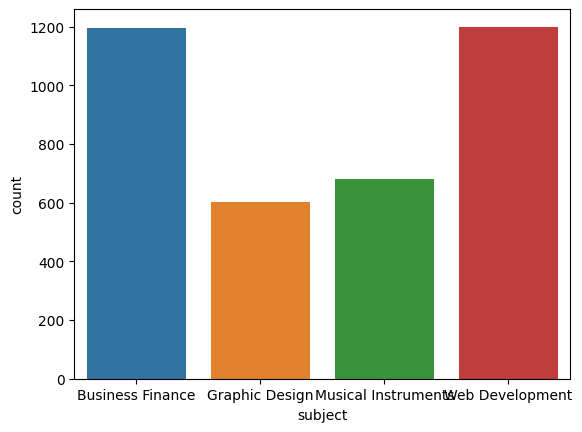

In [18]:
sns.countplot(x='subject', data=course) # 어떤 주제의 강의가 제일 많은지

### 분석 결과   
Business Finance와 Web Development가 가장 많은 비율을 차지하고 있다.

## 어떤 레벨의 강의가 제일 많은가?

<Axes: xlabel='count', ylabel='level'>

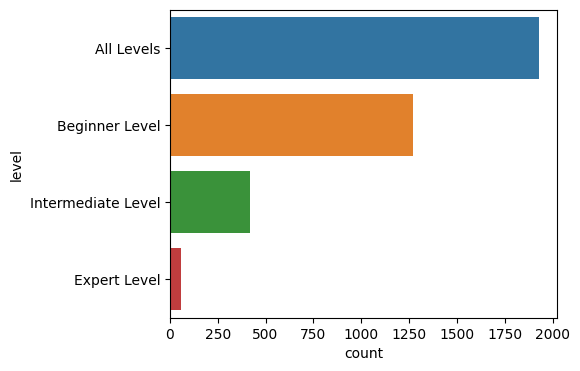

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(y='level', data=course, order=course.level.value_counts().index)

### 분석 결과
강좌의 난이도는 All Levels > Beginner Level > Intermediate Level > Expert Level 순으로 많다

## 주제별 월당 구독자 증가 수

In [20]:
# 월당 구독자 수 증가 수를 구하기 위해 그룹화
course_time = course.sort_values('published_timestamp')
course_grouped = course_time.groupby('subject').apply(lambda x: x.set_index('published_timestamp')['num_subscribers'].cumsum()).reset_index()
course_grouped = course_grouped.rename(columns={0: 'cumulate_subscribers'})

In [21]:
course_time

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2985,8324,Javascript for Beginners,https://www.udemy.com/beginning-javascript/,True,20,3697,195,48,All Levels,3.000000,2011-07-09 05:43:31,Web Development
2491,8325,HTML Tutorial: HTML & CSS for Beginners,https://www.udemy.com/learn-html5/,True,20,12458,253,82,All Levels,4.000000,2011-09-09 15:28:59,Web Development
2701,11174,Become a Web Developer from Scratch,https://www.udemy.com/how-to-become-a-web-deve...,True,120,69186,2408,197,All Levels,27.500000,2011-11-19 21:51:20,Web Development
3082,11153,Learn jQuery: An In-depth Course For Beginners,https://www.udemy.com/jquery/,True,50,7014,95,62,All Levels,4.500000,2011-11-29 01:29:11,Web Development
2700,11475,Become a Certified Web Developer,https://www.udemy.com/become-a-certified-web-d...,True,100,26673,1090,185,All Levels,12.000000,2011-12-20 15:29:25,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
2645,1277924,Angular 4 Front To Back,https://www.udemy.com/angular-4-front-to-back/,True,40,44,0,68,All Levels,8.500000,2017-07-06 15:04:55,Web Development
2405,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516602,2017-07-06 16:12:34,Musical Instruments
1108,1268616,Condor Broken Wing Butterfly Options Trading C...,https://www.udemy.com/condor-broken-wing-butte...,False,0,16,0,15,All Levels,1.500000,2017-07-06 19:47:16,Business Finance
462,1187084,Forex how traders beat the markest with little...,https://www.udemy.com/forex-how-traders-beat-t...,True,100,0,0,16,All Levels,1.000000,2017-07-06 21:16:13,Business Finance


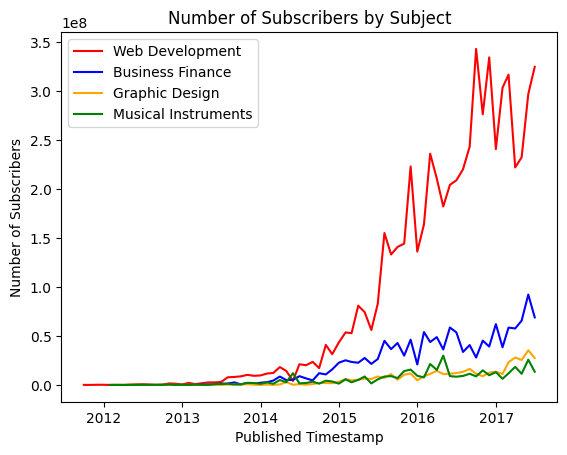

In [22]:
subject_data_names = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']
subject_datas = [
    (
        # 주제마다 그리고 2011-08월 부터 2017-07까지 필터링
        course_grouped[(course_grouped.subject == c) & (course_grouped.published_timestamp.between('2011-08', '2017-07'))]
        .set_index('published_timestamp') # 타임스탬프를 인덱스로 설정
        .resample('M')[['num_subscribers']] # 매 월로 resample한다.
        .sum() #  구독자의 총합을 구한다.
    ) for c in subject_data_names
]

colors = ['red', 'blue', 'orange', 'green']

# 그래프 할당
for i, subject_data in enumerate(subject_datas):
    plt.plot(subject_data, label=subject_data_names[i], color=colors[i])

# 그래프 제목, 범례, 축 레이블 설정
plt.title('Number of Subscribers by Subject')
plt.legend()
plt.xlabel('Published Timestamp')
plt.ylabel('Number of Subscribers')

# 그래프 출력
plt.show()

2011년 8월부터 2017년 7월 이전까지의 월당 구독자 증감 수이다.

이를 통해 2015년 전후로 Web Development 과목의 구독자량이 급등한 것을 알 수 있다.

또한 동시에 Business Finance부분도 따라서 증가했다. 

## 주제별 시간에 따른 누적 구독자 수

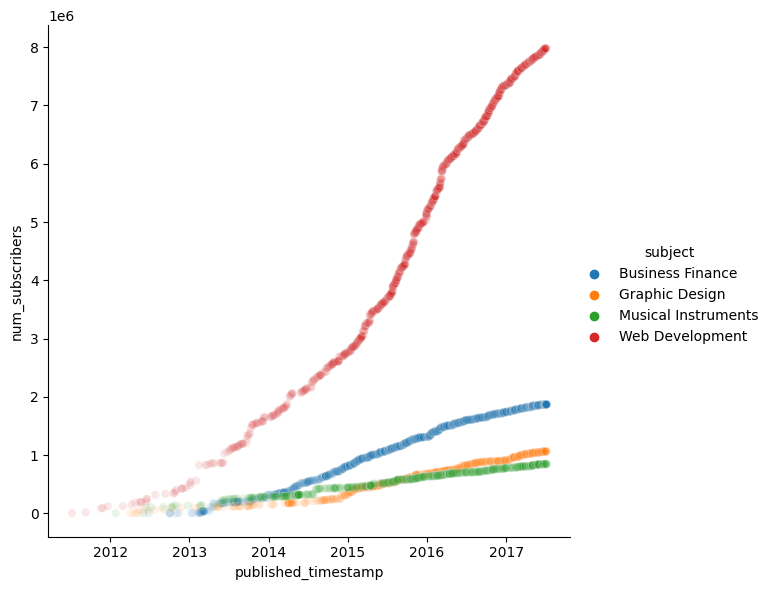

In [23]:
sns.relplot(
    x='published_timestamp',
    y='num_subscribers',
    data=course_grouped,
    hue='subject',
    alpha=.1,
    height=6
)

## 주제별 시간에 따른 누적 구독자수 분석 결과
### Web Development
**Web Development**는 2011부터 누적 구독자 수 1위를 차지하고 있다. 최근까지도 구독자가 느는 속도가 가장 빠르다.
### Business Finance
**Business Finance**는 2014년정도를 기준으로 2위였던 Musical Instruments를 제치고 2위를 차지했다.
### Graphic Design
**Graphic Design**또한 2015년쯤 기준으로 3위였던 Musical Instruments를 제치고 3위를 달성했다.
### Musical Instruments
**Busuness Finance**와 Graphic Design과 경쟁하던 Musical Instruments는 지속적으로 인기를 잃고 있다.


이 시기쯔음에 스타트업 붐이 일어 났고, 2014년 미국에서만 503억 달러 규모의 투자가 이루어 졌으며 2015년에는 이의 50%가 넘는 약 840억 달러의투자가 이뤄질것이라 전망되고 있었다(Ryu, 2015)

이 이후로도 꾸준하게 증가하는 구독자 수를 보면 아직까지도 스타트업 열풍이 크게 식지 않았고, 개발자와 금융 비지니스의 수요가 많다는 것을 알 수 있다.

# 3.1 트랜드 분석 결과 정리     
해당 분석을 통해 시간이 지날수록 온라인 코스의 구독자 수가 증가하고 있음을 알 수 있었다.   
코스 과목 중 "Web Development", 강좌 난이도는 "All Level"이 가장 인기가 많다는 것을 알 수 있었다.

# 3.2 강좌 가격 책정 요인(영향) 분석
하나의 강좌에는 주제, 레벨, 강좌 길이, 구독자 수, 리뷰 수 등 여러 정보가 포함하고 있다.   
어떤 정보가 강좌 가격 책정에 영향을 주는지 알아 보고자 한다.

## 1. 모든 주제 별로 강좌 레벨(Level)에 따른 가격차이 분석

In [24]:
course.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.093750,6.054688,0.0,1.0,2.0,4.50,78.5


{<seaborn.axisgrid.FacetGrid at 0x18058dfce10>}

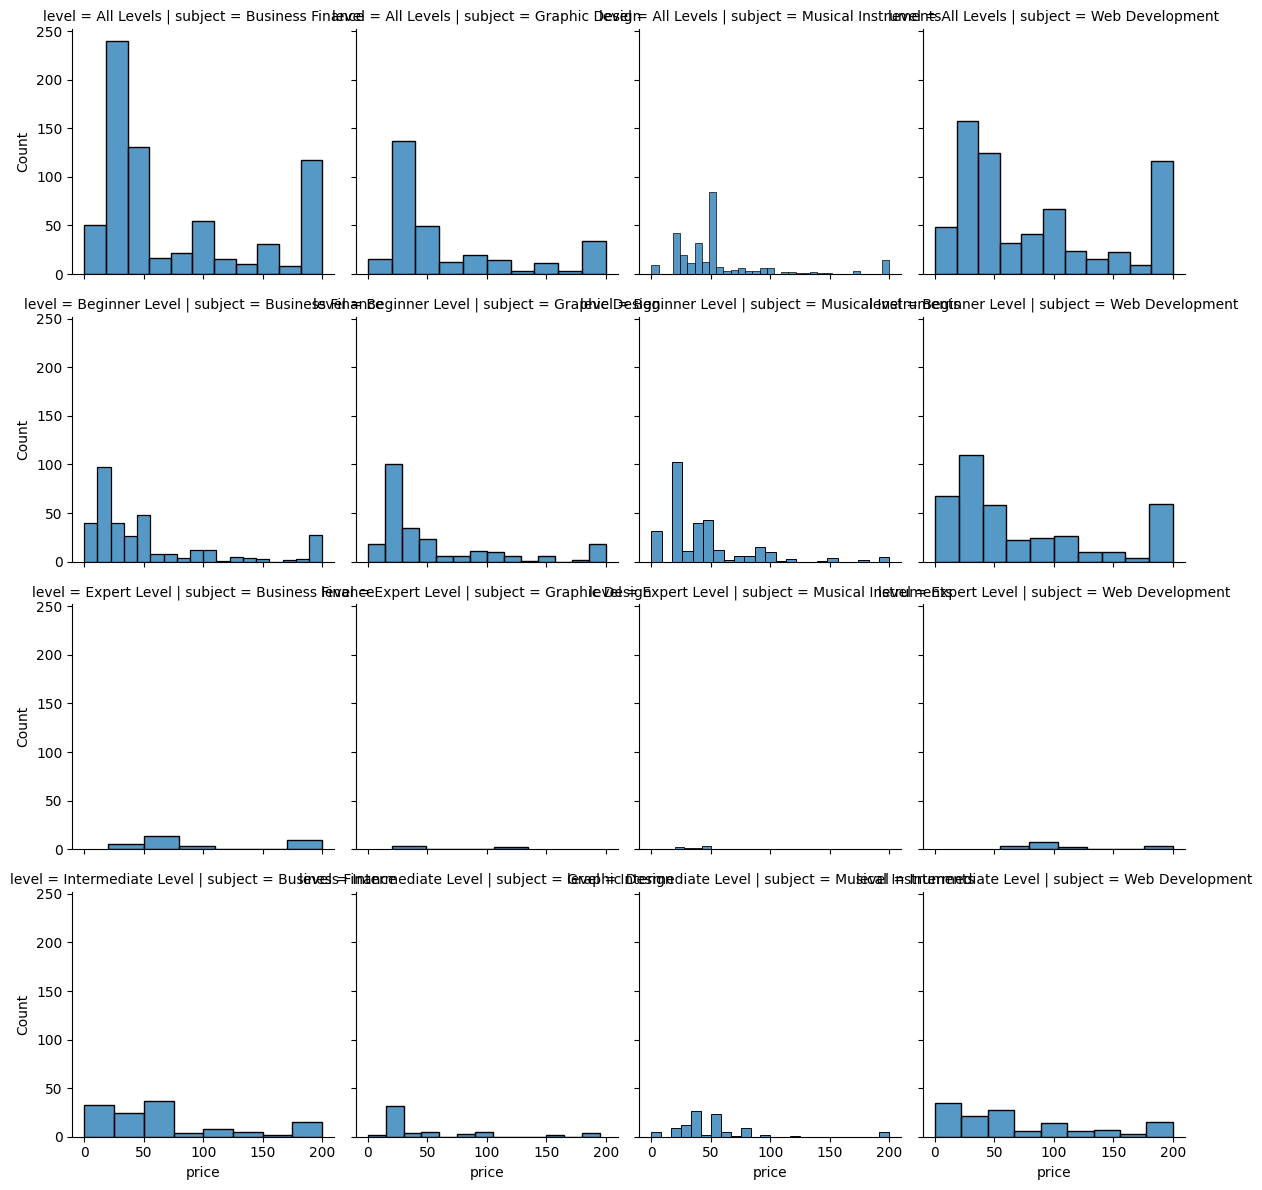

In [25]:
# 모든 주제와 레벨별 가격에 따른 강좌 개수의 통계 한눈에 보기
{
    sns.FacetGrid(course, col = 'subject', row = 'level', palette="tab20c")
        .map(sns.histplot, 'price')
}

<Axes: xlabel='level', ylabel='price'>

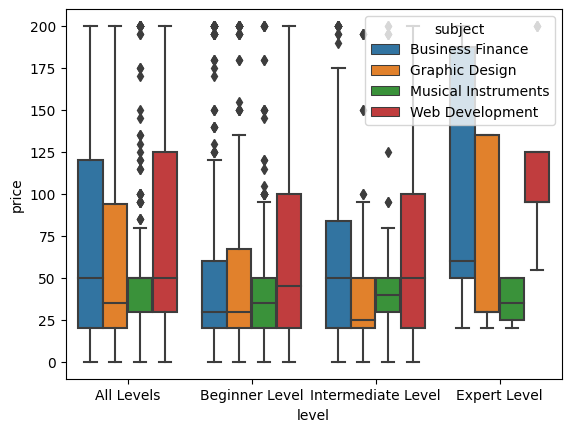

In [26]:
sns.boxplot(data = course, x='level', y='price', hue='subject', order=['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level'])

## 1. 모든 주제 별로 강좌 레벨(Level)에 따른 가격차이 분석 결과 정리
가격의 최대 값은 차이가 없다.

Level이 올라갈 수록 높은 가격이 요구된다. 

또한 Expert Level에서는 무료 강의가 없는 것을 볼 수 있다.

## 2. 강좌 수와 강좌 길이에 따른 가격 상관 관계 분석

### 주제 별 강좌 수에 따른 가격 분포 확인

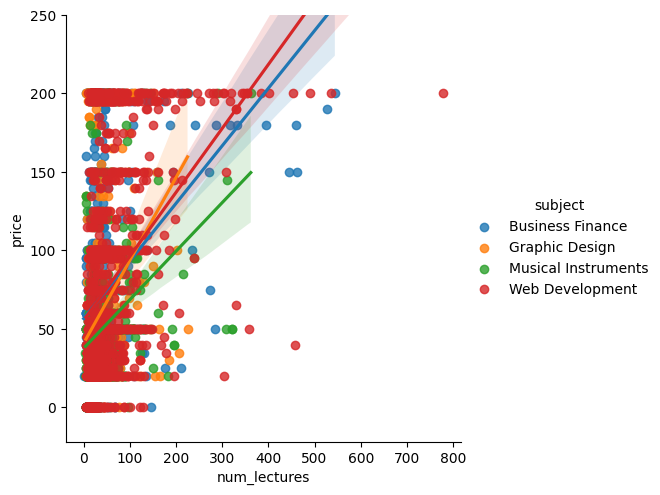

In [27]:
# 주제별 강좌 가격과 강좌 수 비교 
sns.lmplot(x = 'num_lectures', y = 'price', data = course, hue = 'subject').set(ylim=(None, 250))

### 주제 별 가격에 따른 강좌 길이 비교

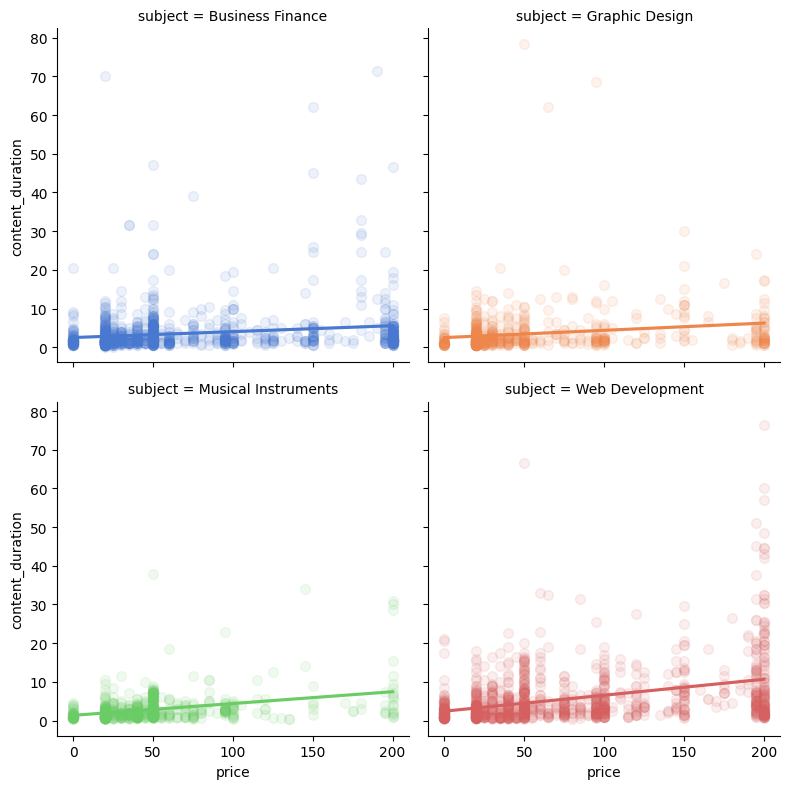

In [28]:
sns.lmplot(
    data=course,
    x="price",
    y="content_duration", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

## 2. 상관관계 분석 결과 정리   
강좌 수와 가격의 상관관계는 관련이 있지 않은 것 같다.   
그나마 강좌 길이와 가격의 상관관계는 약한 관계는 아닌거 같지만 강하지도 않은 것 같다. 자세한 분석은 뒤에서 다루겠다.


## 3. 가격과 강좌 길이에 따른 구독자 수 영향 분석
### 주제별 구독자 수에 따른 가격과 강좌 길이 산점도 보기

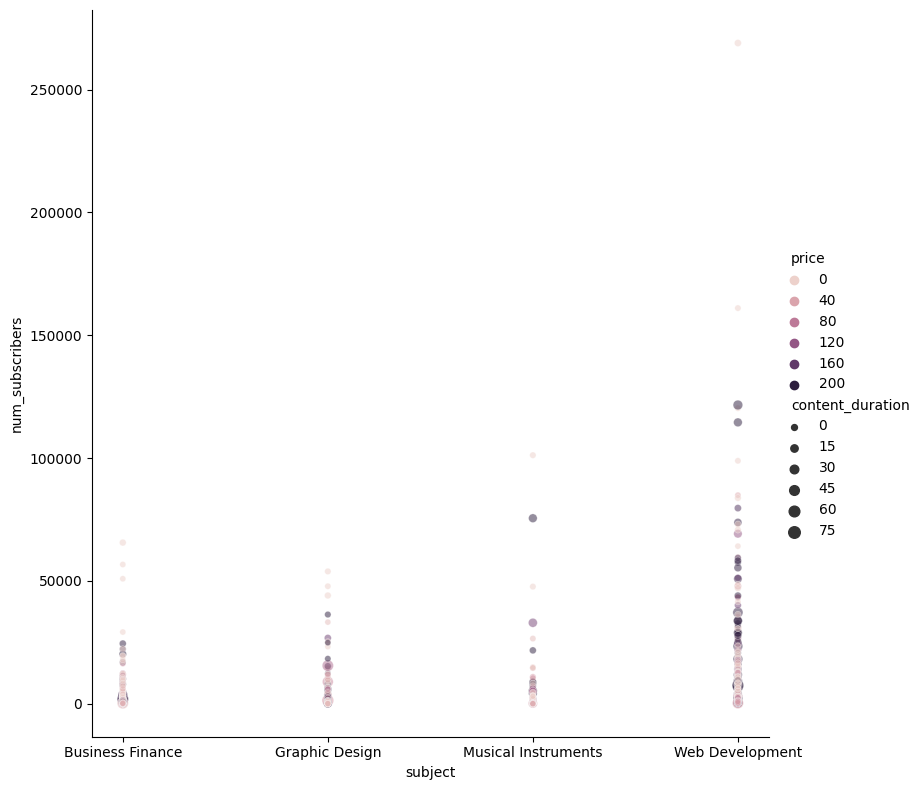

In [29]:
# 주제별 구독자 수에 따른 가격과 강좌 길이
sns.relplot(
    x='subject',
    y='num_subscribers',
    data=course,
    hue='price',
    size='content_duration',
    alpha=.5,
    height=8
)

## 4. 구독자 수, 리뷰 수에 따른 강좌 가격 영향 분석

### Part.1 주제 별 구독자와 리뷰수 상관관계 분석

### 주제 별 총 리뷰수 확인

{'Web Development': 430025, 'Graphic Design': 37070, 'Musical Instruments': 31724, 'Business Finance': 75902}


<Axes: xlabel='value'>

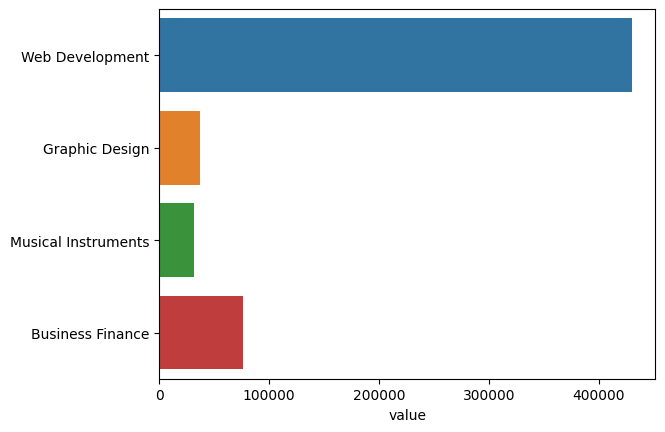

In [30]:
# 각 주제별로 리뷰 수의 총합을 확인하기 위한 dictionary 선언
data = {i:0 for i in set(course.subject.values)}

# 리뷰수 총합을 계산
course_data = course[['subject', 'num_reviews']]
for index, row in course_data.iterrows():
    data[row.subject] += row.num_reviews
print(data) # 데이터 출력
# 총 리뷰 수 그래프로 출력
df = pd.DataFrame.from_dict(data, orient='index', columns=['value'])
sns.barplot(y=df.index, x = 'value', data=df)


Web Development가 압도적으로 많은 리뷰 수를 가지고 있고, Business Finance, Graphic Design, Musical Instruments 순으로 많다

### 주제 별 구독자 수에 따른 리뷰 수 상관관계 분석
log함수로 보기 쉽게 만들었다.

In [31]:
course['log_subscribers'] = course['num_subscribers'].apply(lambda x: np.log10(x if x != 0 else 1))
course['log_reviews'] = course['num_reviews'].apply(lambda x: np.log10(x if x != 0 else 1))
course['published_str'] = course['published_timestamp'].apply(lambda x: int(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').timestamp()))

데이터의 격차를 줄이기 위해 log를 사용했다.

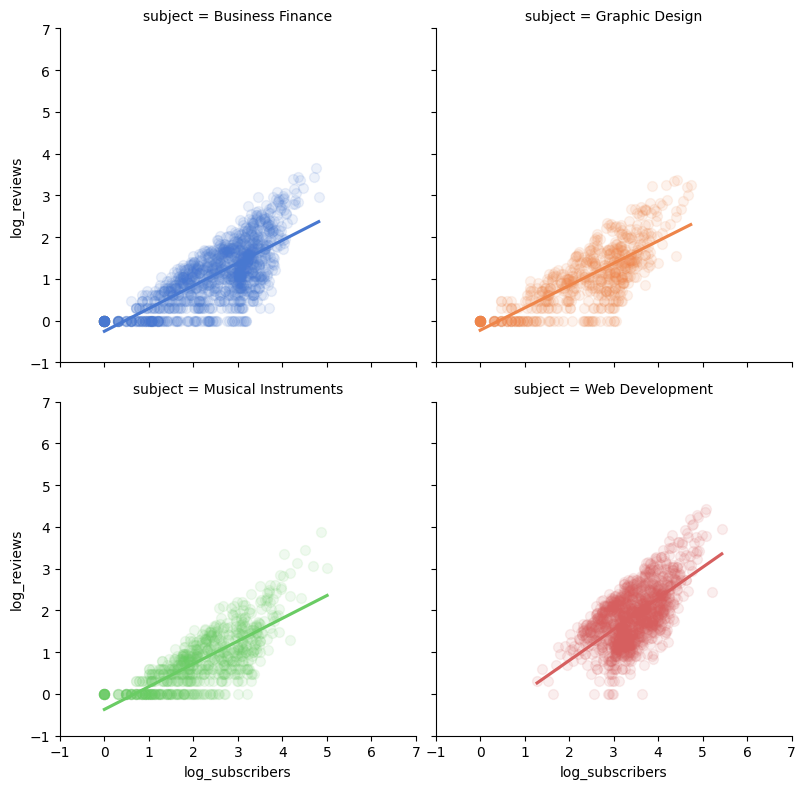

In [32]:
# 구독자와 리뷰수의 상관관계
g = sns.lmplot(
    data=course,
    x="log_subscribers",
    y="log_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)
g.set(xlim=(-1, 7), ylim=(-1, 7))

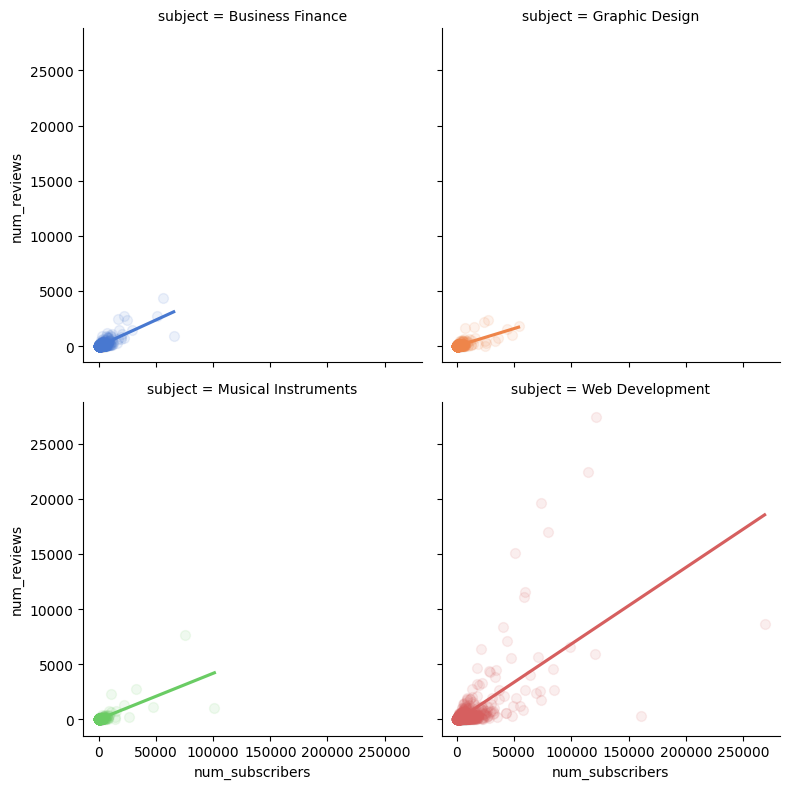

In [33]:
# log로 취하지 않은 구독자와 리뷰수의 상관관계
sns.lmplot(
    data=course,
    x="num_subscribers",
    y="num_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

### 주제별 구독자 수에 따른 리뷰 수 분석 결과
그래프로 봤을 때 주제별 구독자 수에 따른 리뷰 수의 상관관계에서 유의미한 결과는 없었다.

### Part.2 구독자 수, 리뷰 수에 따른 가격 확인

### 강좌 가격에 따른 구독자 수 분포 확인

<Axes: xlabel='price', ylabel='num_subscribers'>

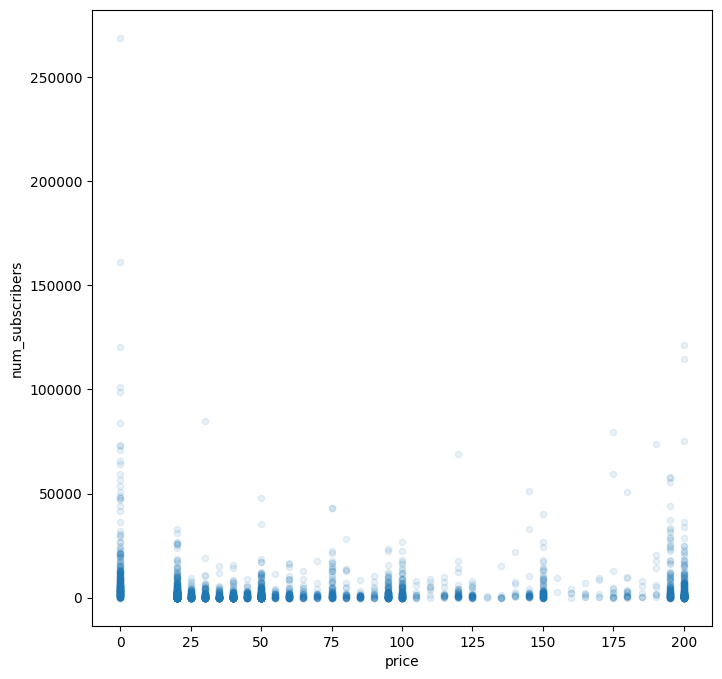

In [34]:
fig, ax = plt.subplots(figsize=(8,8))
course.plot.scatter(
    x = 'price',
    y = 'num_subscribers',
    alpha = .1,
    ax=ax
)

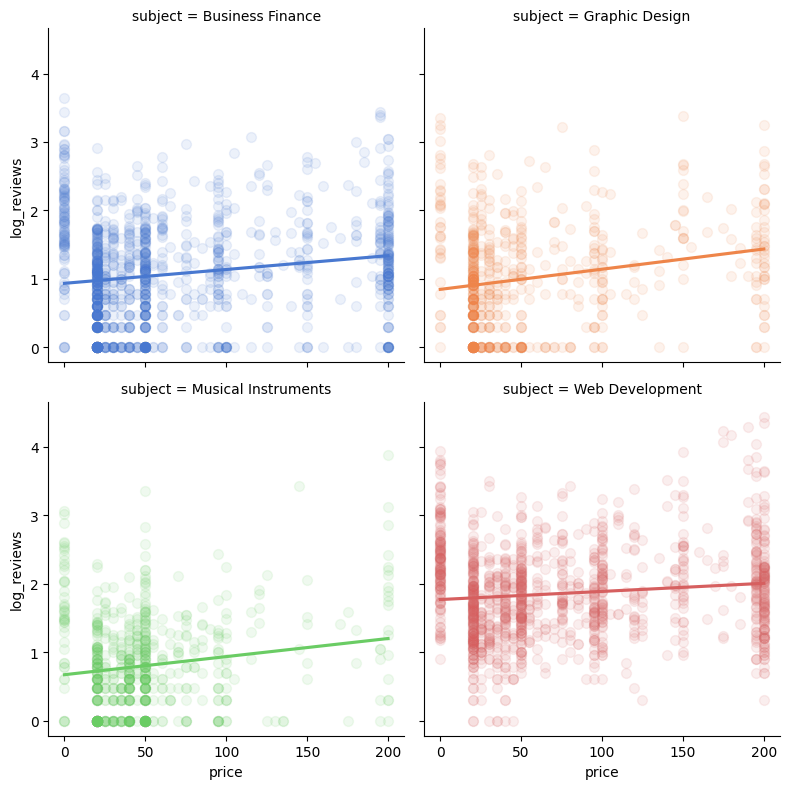

In [35]:
# 주제 별 가격에 따른 리뷰 수
sns.lmplot(
    data=course,
    x="price",
    y="log_reviews", col="subject", hue="subject",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": .1}
)

## 구독자 수, 리뷰 수에 따른 강좌 가격 영향 분석 결과 정리
가격인 0인 강좌가 다른 강좌에 비해 구독자 수 분포가 많다.   
주제 별 가격에 따른 리뷰수는 낮은 상관관계를 보이며, 가격이 0이여도 리뷰수가 없는 것도 존재한다.

## 강좌 가격 영향 분석 수치화 및 결과 정리
위에서 시각화 했던 요인들을 수치로 상관관계를 분석해 보고자 한다.   
수치형 자료 중에서 서로의 상관관계를 비트맵으로 출력한다.
### 주제 별 가격, 구독자 수, 리뷰 수, 강좌 길이 상관관계 분석   

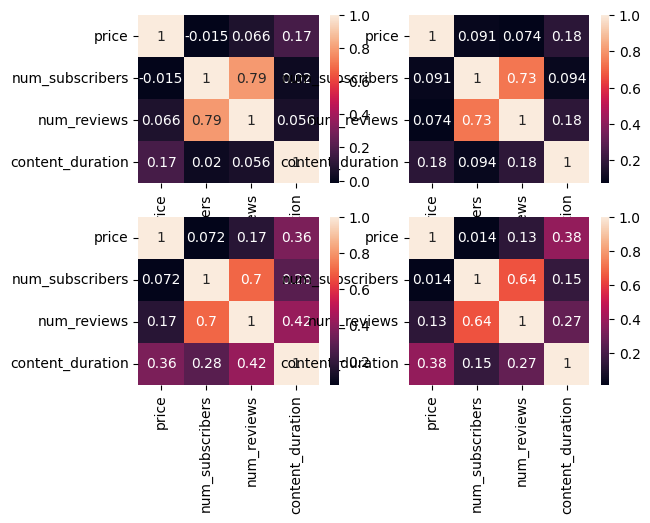

In [36]:
# 상단 왼쪽 부터 "Business Finance", "Graphic Design", "Musical Instruments", "Web Development"
# stats.pearsonr(
#     course.num_reviews.values, 
#     course.num_subscribers.values
# )
# sns.heatmap(course.corr(), annot=True)
col = ['price', 'num_subscribers','num_reviews', 'content_duration']
subjects = ['Business Finance',
 'Graphic Design',
 'Musical Instruments',
 'Web Development']
# print(course.columns) # 
fig, ax = plt.subplots(ncols=2, nrows=2)
for sub_len in range(len(subjects)):
    sub=subjects[sub_len]
    sns.heatmap(course[course['subject'].isin([sub])][col].corr(), annot=True, ax=ax[sub_len//2,sub_len%2])
# sns.heatmap(course[course['subject'].isin([subjects[0]])][col].corr(), annot=True)

## 분석 결과
가격에 대한 상관계수는 대부분(구독자 수, 리뷰수, 콘텐츠 길이) 높지 않았다.

그나마 가장 높은 것이 콘텐츠의 길이(duration)라고 할 수 있다.

# 3.2 강좌 가격 책정 요인(영향) 분석 결과 정리
- 모든 강좌의 공통점은 리뷰수와 구독자 수의 상관관계가 높다는 것이다. 그 중에서도 'Business Finance'가 제일 큰 상관관계를 보이고 있다. 리뷰수가 많으면 이후 수강생들의 구독률에 좋은 영향을 끼칠 수 있다.
- 대체로 가격과 강좌 길이는 상관관계가 없지만, 유독 Web Development에서는 다른 주제보다 높게 나오고 있다.

# 3.3 강좌 수익 분석


 수익 column 추가

In [37]:
course['earning'] = course['price']*course['num_subscribers']

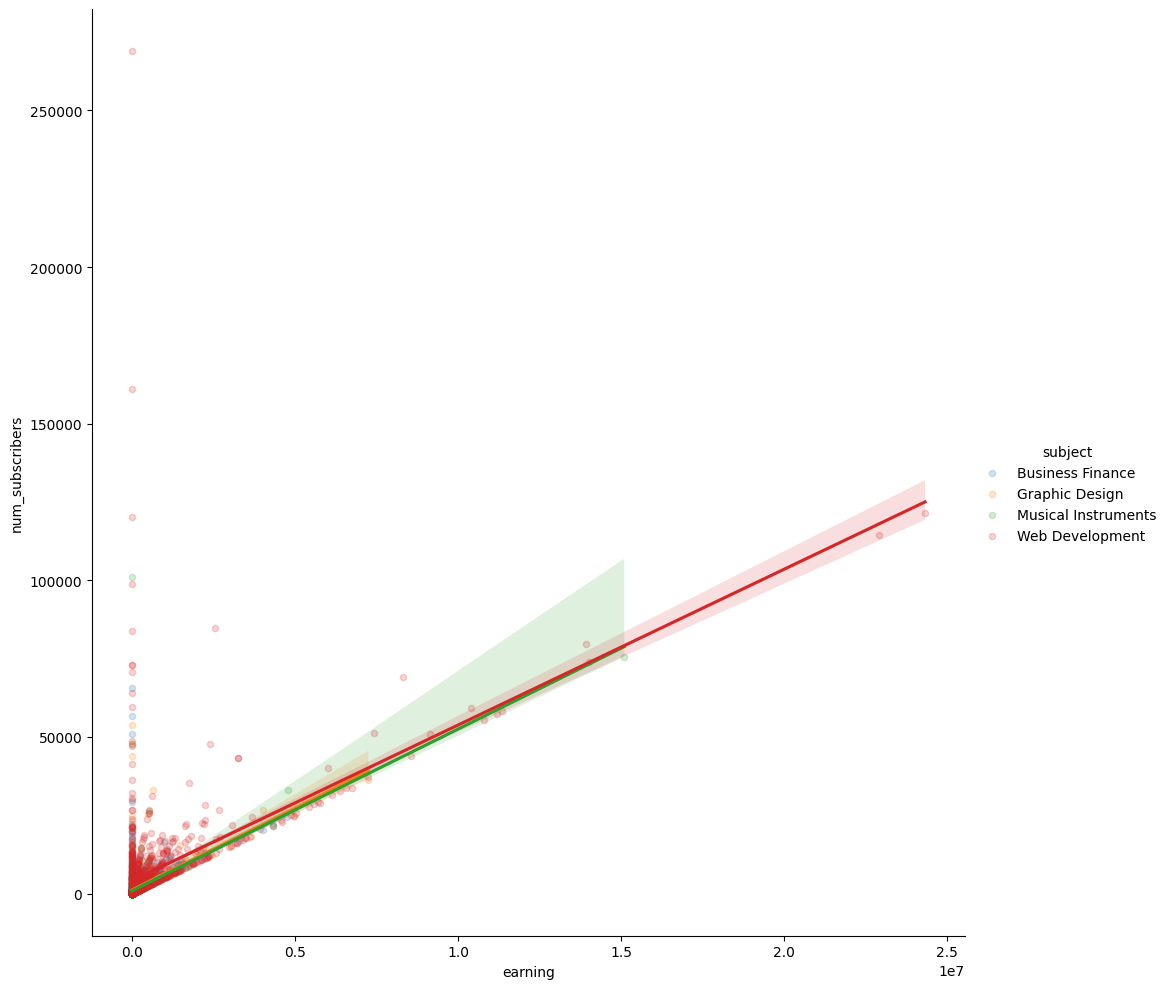

In [38]:
# fig, ax = plt.subplots(figsize=(10, 10))
sns.lmplot(data=course, x='earning', y='num_subscribers', scatter_kws={"s": 20, "alpha": .2}, hue='subject', height=10)

# 수익 분석 결과

Web Development 분야에서 가장 많은 수익이 난다.

### 레벨별 수익

<Axes: xlabel='level', ylabel='earning'>

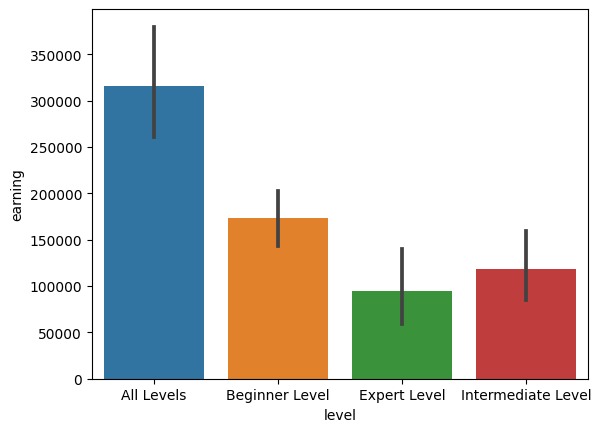

In [39]:
sns.barplot(x='level', y='earning', data=course)

레벨별 수익으로는 All Levels, Beginner Level, Intermediate Level, Expert Level 순으로 많습니다.

In [40]:
course['earning']

0       429400
1       209400
2        97830
3       232845
4       255200
         ...  
3673    104000
3674      7650
3675     20520
3676     15000
3677     40545
Name: earning, Length: 3678, dtype: int32

<Axes: xlabel='price', ylabel='Count'>

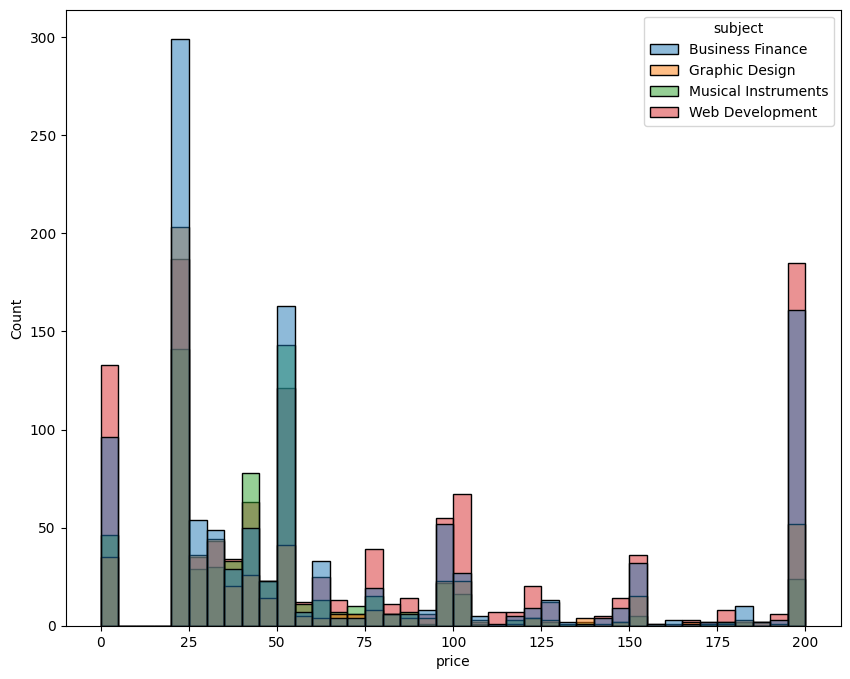

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(x='price',
              data=course, hue='subject', binwidth=5,
            ax=ax
         )

In [50]:
course.sort_values(by='earning', ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,log_subscribers,log_reviews,published_str,earning
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27,Web Development,5.084876,4.438463,1446466407,24316800
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36,Web Development,5.058851,4.350481,1457443716,22902400
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51,Musical Instruments,4.877941,3.885135,1407360471,15099800
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29,Web Development,4.867956,4.293340,1455143369,14018770
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54,Web Development,4.900979,4.229835,1426169994,13932100
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48,Web Development,4.764983,4.046222,1441022868,11350560
2662,556248,The Complete HTML & CSS Course - From Novice T...,https://www.udemy.com/htmlwebsite/,True,195,57422,874,84,All Levels,7.5,2015-07-27 16:57:52,Web Development,4.759078,2.941511,1437983872,11197290
3175,580466,Complete PHP Course With Bootstrap3 CMS System...,https://www.udemy.com/complete-php-course/,True,195,55332,1225,144,All Levels,20.0,2015-09-22 18:14:08,Web Development,4.742976,3.088136,1442913248,10789740
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25,Web Development,4.773501,4.063709,1411487845,10388175
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28 19:20:21,Web Development,4.705992,4.179466,1451298021,9146700


In [55]:
course[course['subject'] == 'Web Development'].sort_values(by='price', ascending=False).head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,log_subscribers,log_reviews,published_str,earning
3533,30261,"Kids Coding -Introduction to HTML, CSS and Jav...",https://www.udemy.com/kids-coding-introduction...,True,200,2355,143,215,Beginner Level,7.0,2012-11-26 20:00:40,Web Development,3.371991,2.155336,1353927640,471000
3620,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,True,200,50,5,60,Beginner Level,5.0,2017-05-29 17:56:24,Web Development,1.698970,0.698970,1496048184,10000
3489,615106,Ultimate guide to Social Media Web development...,https://www.udemy.com/ultimate-guide-to-social...,True,200,11011,13,36,All Levels,2.5,2015-09-20 18:13:38,Web Development,4.041827,1.113943,1442740418,2202200
2758,595728,Complete HTML5 and CSS3 Course +1 Start to Fin...,https://www.udemy.com/complete-html5-and-css3-...,True,200,3887,81,94,All Levels,8.5,2015-09-07 23:42:50,Web Development,3.589615,1.908485,1441636970,777400
2756,1236746,WordPress Tips and Tricks,https://www.udemy.com/wordpress-tips-and-tricks/,True,200,1117,10,37,Intermediate Level,2.5,2017-06-08 17:44:18,Web Development,3.048053,1.000000,1496911458,223400


각 주제별 상위 5개 강좌들에대한 DF 생성

In [80]:
top_courses = pd.concat([
    course[course['subject'] == 'Web Development'].
    sort_values(by='earning', ascending=False).head(),
    
    course[course['subject'] == 'Business Finance'].
    sort_values(by='earning', ascending=False).head(),
    
    course[course['subject'] == 'Graphic Design'].
    sort_values(by='earning', ascending=False).head(),
    
    course[course['subject'] == 'Musical Instruments'].
    sort_values(by='earning', ascending=False).head()
])

수익별 리뷰 수 산점도

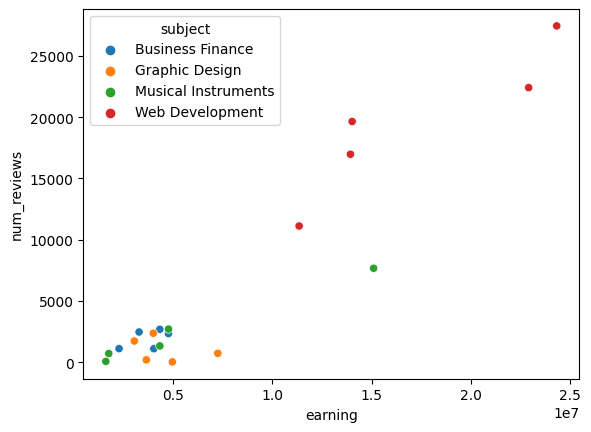

In [81]:
sns.scatterplot(
    data=top_courses,
    x='earning', y='num_reviews', hue='subject'
)
plt.show()

Wordcloud설치

In [43]:
!pip install --upgrade pip
!pip install wordcloud

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\yuns\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from wordcloud import WordCloud

In [45]:
set(course['subject'])

{'Business Finance',
 'Graphic Design',
 'Musical Instruments',
 'Web Development'}



주제: Web Development


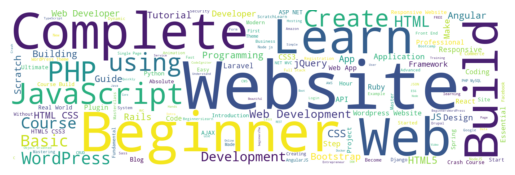

Website : 1.0
Beginner : 0.9642857142857143
Web : 0.8571428571428571
Complete : 0.7946428571428571
Learn : 0.7142857142857143
Build : 0.6964285714285714
JavaScript : 0.6428571428571429
PHP : 0.5714285714285714
using : 0.5625
Create : 0.5625


주제: Graphic Design


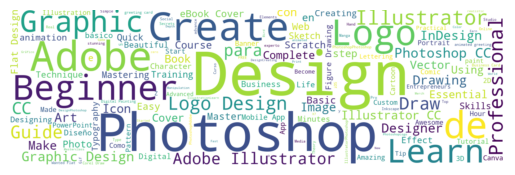

Design : 1.0
Photoshop : 0.7378640776699029
Adobe : 0.4174757281553398
Create : 0.3786407766990291
de : 0.33980582524271846
Logo : 0.3106796116504854
Beginner : 0.2912621359223301
Learn : 0.2621359223300971
Graphic : 0.24271844660194175
Illustrator : 0.22330097087378642


주제: Musical Instruments


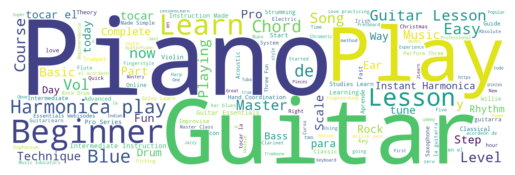

Piano : 1.0
Guitar : 0.8698630136986302
Play : 0.6575342465753424
Beginner : 0.5342465753424658
Learn : 0.3972602739726027
Lesson : 0.2808219178082192
Harmonica play : 0.273972602739726
Blue : 0.2602739726027397
Chord : 0.21232876712328766
de : 0.21232876712328766


주제: Business Finance


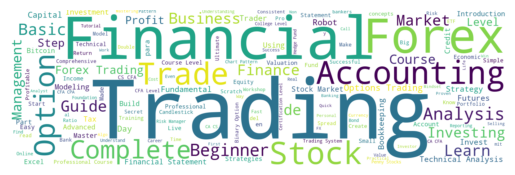

Trading : 1.0
Financial : 0.4427083333333333
Forex : 0.421875
Accounting : 0.3802083333333333
Stock : 0.3645833333333333
Trade : 0.3489583333333333
Option : 0.3072916666666667
Complete : 0.234375
Analysis : 0.21354166666666666
Beginner : 0.20833333333333334


In [46]:
# course[course.subject=='Web Development']
for subject in set(course.subject): 
    text = ''.join(v for v in course[course.subject==subject]['course_title'])
    wc = WordCloud(
        background_color='white',
        max_words=150,
        width=1600,
        height=500
    ).generate(text)
    print('\n\n주제: ' + subject)
    plt.figure()
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    top_words = sorted(wc.words_.items(), key=lambda x: x[1], reverse=True)[:10]
    for word, num in top_words:
        print(f'{word} : {num}')

### 주제별 주요 키워드
각 주제별로 주요 키워드 상위 10개의 단어를 리스트업했습니다.

# 4. 결론 및 활용 방안
---

코로나 19 이후 온라인 교육시장이 활발해짐에 따라 코스 제공자, 수강자 분들에게 가이드라인을 제시하여, 과목의 제공 및 수강 선택에 합리적인 결정을 내릴 수 있게 도움을 주고자 합니다.

가이드라인 첫 번째로는, 코스 제작에 도움을 제공할 수 있습니다. 예를 들어서 All Level을 대상으로 하는 Web Development강좌를 만드는 것이 수익을 최대화하는데 효율적일 수 있습니다.

두 번재로는 트렌드 방향 파악에 있습니다. 분석한 그래프를 보면, 2014년을 기준으로 Web Development의 강좌 수가 급증하는 것을 알 수 있습니다. 이는 Web Development의 트렌드가 상승세라는 방증입니다.

세 번재로 WordCloud를 통해 각 주제별 주요 키워드를 확인해볼 수 있습니다. 각 주제별로 가장 인기 있는 키워드를 알 수 있습니다.


마지막으로, 이 뿐만 아니라 추가적인 데이터가 있다면 자연어 분석과 같은 AI 분석 등을 통해 더 자세한 데이터를 얻을 수 있고, 강좌를 제작하는데에 더 큰 힘이 될 수 있습니다. 